In [272]:
# Dependencies and Setup
import os 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [273]:
#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [274]:
price_path = os.path.join("..", "data","Consumption.csv")
cents_KWh_df = pd.read_csv(price_path)
cents_KWh_df.head(11)

,Year Cons,Residential Cons,Commercial Cons,Industrial Cons,Transportation Cons,Cents Per Kwh
0,2010,11.54,10.19,6.77,10.56,9.83
1,2011,11.72,10.24,6.82,10.46,9.90
2,2012,11.88,10.09,6.67,10.21,9.84
3,2013,12.13,10.26,6.89,10.55,10.07
4,2014,12.52,10.74,7.10,10.45,10.44
5,2015,12.65,10.64,6.91,10.09,10.41
6,2016,12.55,10.43,6.76,9.63,10.27
7,2017,12.89,10.66,6.88,9.68,10.48
8,2018,12.87,10.67,6.92,9.70,10.53


In [275]:
consump_path = os.path.join("..", "data","Consumption_3.csv")
MWh_df = pd.read_csv(consump_path)
MWh_df.head(11)

,Year,Residential,Commercial,Industrial,Transportation,All Sectors
0,2010,1445708403,1330199364,971221189,7712412,3754841368
1,2011,1422801093,1328057439,991315564,7672084,3749846180
2,2012,1374514708,1327101196,985713854,7320028,3694649786
3,2013,1394812129,1337078777,985351874,7625041,3724867821
4,2014,1407208311,1352158263,997576138,7757555,3764700267
5,2015,1404096499,1360751527,986507732,7636632,3758992390
6,2016,1411058153,1367191386,976715181,7496910,3762461630
7,2017,1378647742,1352887694,984297945,7522593,3723355974
8,2018,1469093059,1381754845,1000672553,7664804,3859185261


In [276]:
df1 = pd.DataFrame(MWh_df, columns = ['Year', 'Residential', 'Commercial', 'Industrial', 'Transportation', 'All Sectors'])

df1                                           

,Year,Residential,Commercial,Industrial,Transportation,All Sectors
0,2010,1445708403,1330199364,971221189,7712412,3754841368
1,2011,1422801093,1328057439,991315564,7672084,3749846180
2,2012,1374514708,1327101196,985713854,7320028,3694649786
3,2013,1394812129,1337078777,985351874,7625041,3724867821
4,2014,1407208311,1352158263,997576138,7757555,3764700267
5,2015,1404096499,1360751527,986507732,7636632,3758992390
6,2016,1411058153,1367191386,976715181,7496910,3762461630
7,2017,1378647742,1352887694,984297945,7522593,3723355974
8,2018,1469093059,1381754845,1000672553,7664804,3859185261


In [277]:
df2 = pd.DataFrame(cents_KWh_df, columns = ['Year Cons', 'Residential Cons', 'Commercial Cons', 'Industrial Cons', 'Transportation Cons', 'Cents Per Kwh'])

df2

,Year Cons,Residential Cons,Commercial Cons,Industrial Cons,Transportation Cons,Cents Per Kwh
0,2010,11.54,10.19,6.77,10.56,9.83
1,2011,11.72,10.24,6.82,10.46,9.90
2,2012,11.88,10.09,6.67,10.21,9.84
3,2013,12.13,10.26,6.89,10.55,10.07
4,2014,12.52,10.74,7.10,10.45,10.44
5,2015,12.65,10.64,6.91,10.09,10.41
6,2016,12.55,10.43,6.76,9.63,10.27
7,2017,12.89,10.66,6.88,9.68,10.48
8,2018,12.87,10.67,6.92,9.70,10.53


In [278]:


df_col = pd.concat([df1,df2], axis=1)

df_col


,Year,Residential,Commercial,Industrial,Transportation,All Sectors,Year Cons,Residential Cons,Commercial Cons,Industrial Cons,Transportation Cons,Cents Per Kwh
0,2010,1445708403,1330199364,971221189,7712412,3754841368,2010,11.54,10.19,6.77,10.56,9.83
1,2011,1422801093,1328057439,991315564,7672084,3749846180,2011,11.72,10.24,6.82,10.46,9.90
2,2012,1374514708,1327101196,985713854,7320028,3694649786,2012,11.88,10.09,6.67,10.21,9.84
3,2013,1394812129,1337078777,985351874,7625041,3724867821,2013,12.13,10.26,6.89,10.55,10.07
4,2014,1407208311,1352158263,997576138,7757555,3764700267,2014,12.52,10.74,7.10,10.45,10.44
5,2015,1404096499,1360751527,986507732,7636632,3758992390,2015,12.65,10.64,6.91,10.09,10.41
6,2016,1411058153,1367191386,976715181,7496910,3762461630,2016,12.55,10.43,6.76,9.63,10.27
7,2017,1378647742,1352887694,984297945,7522593,3723355974,2017,12.89,10.66,6.88,9.68,10.48
8,2018,1469093059,1381754845,1000672553,7664804,3859185261,2018,12.87,10.67,6.92,9.70,10.53


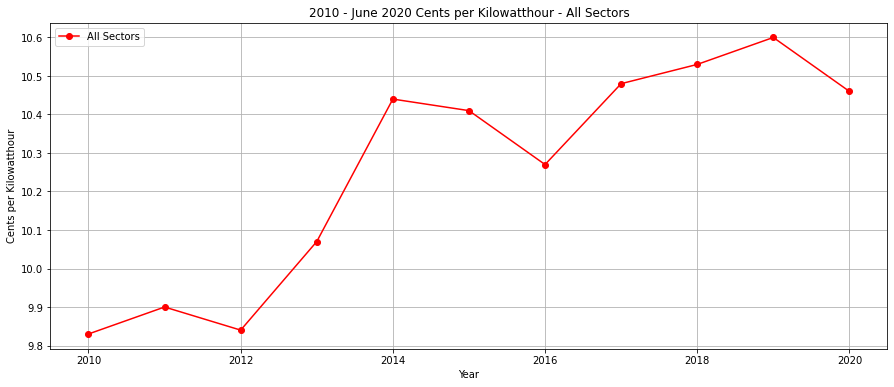

In [279]:
plt.figure(figsize=(15,6))

Year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
All_Sectors = [9.83,9.90,9.84,10.07,10.44,10.41,10.27,10.48,10.53,10.60,10.46]
  
plt.plot(Year, All_Sectors, color='red', marker='o')
plt.title('2010 - June 2020 Cents per Kilowatthour - All Sectors')
plt.xlabel('Year')
plt.ylabel('Cents per Kilowatthour')

plt.grid(True)
plt.legend(['All Sectors'], loc='upper left')
    
plt.show()

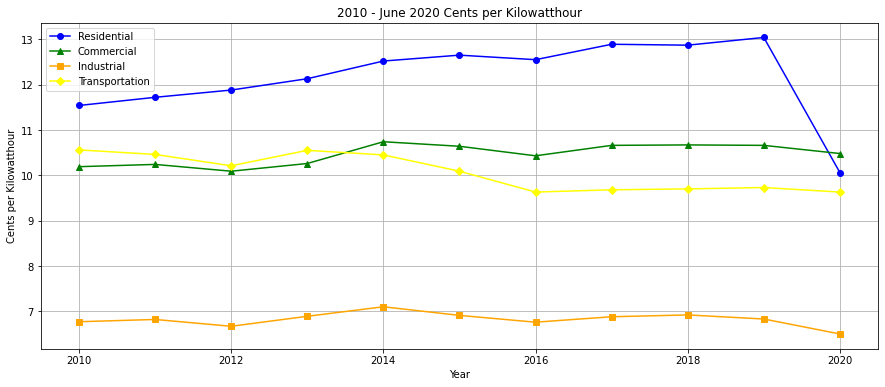

In [280]:
plt.figure(figsize=(15,6))
Year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

Residential = [11.54,11.72,11.88,12.13,12.52,12.65,12.55,12.89,12.87,13.04,10.06]
Commercial = [10.19,10.24,10.09,10.26,10.74,10.64,10.43,10.66,10.67,10.66,10.48]
Industrial = [6.77,6.82,6.67,6.89,7.1,6.91,6.76,6.88,6.92,6.83,6.5]
Transportation = [10.56,10.46,10.21,10.55,10.45,10.09,9.63,9.68,9.7,9.73,9.63]

plt.plot(Year, Residential, color='blue', marker='o')
plt.plot(Year, Commercial, color='green', marker='^')
plt.plot(Year, Industrial, color='orange', marker='s')
plt.plot(Year, Transportation, color='yellow', marker='D')

         
plt.title("2010 - June 2020 Cents per Kilowatthour")
plt.xlabel('Year')
plt.ylabel('Cents per Kilowatthour')

plt.grid(True)
plt.legend(['Residential','Commercial', 'Industrial', 'Transportation'], loc="upper left")

plt.show()

<Figure size 1080x432 with 0 Axes>

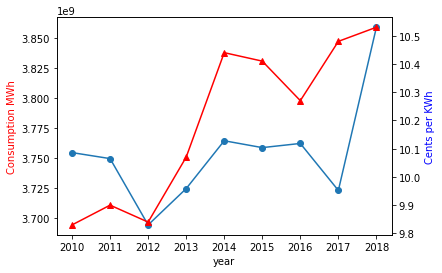

In [284]:
plt.figure(figsize=(15,6))
fig,ax=plt.subplots()
ax.plot(df_col.Year, df_col['All Sectors'], marker="o")
ax.set_xlabel("year")
ax.set_ylabel("Consumption MWh", color="red")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_col.Year, df_col["Cents Per Kwh"], color="red", marker="^")
ax2.set_ylabel("Cents per KWh", color="blue")
               
plt.show()


